# **Machine Learning - case: estilo musical**

* Os <u>métodos de ensemble</u> são técnicas avançadas, geralmente usadas para resolver problemas complexos de aprendizado de máquina.
  * É um processo em que modelos diferentes e independentes são combinados para produzir um resultado.
  * A hipótese é que a combinação de vários modelos pode produzir melhores resultados, diminuindo o erro de generalização.
  
* Os modelo mais populares para modelagem são Bagging, Boosting e Voting.

[Fonte.](https://www.pluralsight.com/guides/ensemble-modeling-scikit-learn)

#### **Importando as bibliotecas necessárias**

In [1]:
import sklearn
import pandas as pd
import numpy as np
# para ignorar os avisos de mensagens das funções
import warnings
warnings.filterwarnings("ignore")

# pacote para trabalhar com data frame (tabelas)
import pandas as pd
# pacote mais básico para vizualização gráfica
import matplotlib.pyplot as plt
# um dos pacotes para fazer gráficos
import seaborn as sns
# sklearn - pacote análise de dados
# existe grande parte dos métodos mais famosos
from sklearn.model_selection import train_test_split
# função para fazer avaliação dos modelos
from sklearn.metrics import classification_report

#### **Explicação da base de dados**

* **Base de dados**: devido à natureza artística da música, as classificações são frequentemente arbitrárias e controversas, e alguns gêneros podem se sobrepor.
* **Variáveis**:
  * <u>filename</u> - nome do arquivo conforme fornecido no conjunto de dados marsyas;
  * <u>tempo</u> - a velocidade com que uma passagem de música é tocada;
  * <u>beats</u> - unidade rítmica na música;
  * <u>chroma_stft</u> - transformada de Fourier de curto tempo;
  * <u>rmse</u> - erro de raiz quadrada média;
  * <u>spectral_centroid</u> - indica onde o "centro de massa" do espectro está localizado;
  * <u>spectral_bandwidth</u> - é o intervalo de comprimento de onda em que uma quantidade espectral irradiada não é inferior a metade de seu valor máximo;
  * <u>rolloff</u> - roll-off é a inclinação de uma função de transmissão com frequência;
  * <u>zero_crossing_rate</u> - a taxa na qual o sinal muda de positivo para negativo ou de volta;
  * <u>mfcc1 a mfcc20</u> - coeficientes cepstrais de frequência de Mel (MFCCs) são coeficientes que coletivamente constituem um MFC;
  * <u>label</u> - o estilo musical da música.
* **Objetivo**: treinar uma modelo e saiba a qual gênero sua música favorita pertence.
  * A variável resposta será: label (nome do estilo musical).
* **Técnica usada**: modelos ensembles: Bagging, Random Forest, AdaBoost, Gradiente Estocástico Boosting e Voting Ensemble.

[base de dados](https://www.kaggle.com/insiyeah/musicfeatures)

#### **Carregando os dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estagio_TAO_Python/Datasets/data_music.csv', sep = ",")

# tamanho da base de dados
print(df.shape)

(1000, 30)


Temos na base 30 variáveis, sendo 29 variáveis explciativas ($X$) e 1 variável resposta ($y$). Em cada linha temos dados de uma música.

In [4]:
# vizualizando as cinco primeiras linhas da base de dados
df.head(5)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [5]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Nesta base de dados sobre música temos 10 estilos musicais, mostrados acima.

#### **Informações da base de dados**

**Informações sobre os tipos das variáveis da base de dados**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

A base de dados tem 1000 linhas de dados, não havendo dados faltantes. A maiori dos dados é numérico (inteiro ou real), com exceção da label que é a variável resposta que contém o estilo musical da música e do filename, que tem o código da música.

**Quantidade de dados por estilo musical**

In [7]:
geral = pd.DataFrame([df['label'].value_counts(normalize = False), df['label'].value_counts(normalize = True)*100]).T
geral.columns = ['valor', 'proporção']
geral

,valor,proporção
reggae,100.0,10.0
rock,100.0,10.0
classical,100.0,10.0
jazz,100.0,10.0
pop,100.0,10.0
metal,100.0,10.0
hiphop,100.0,10.0
disco,100.0,10.0
blues,100.0,10.0
country,100.0,10.0


Verificamos que as classes referente ao estilo musical tem mesma proporção de dados.

#### **Análise descritiva dos dados**

A seguir temos as estatísticas de cada variável da base de dados.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,1000.0,119.601702,28.297367,54.978391,99.384014,117.453835,135.999178,234.907670
beats,1000.0,57.138000,14.225728,18.000000,47.000000,56.000000,65.250000,117.000000
chroma_stft,1000.0,0.378656,0.081689,0.171782,0.319641,0.383075,0.435974,0.663573
rmse,1000.0,0.130929,0.065685,0.005276,0.086625,0.122448,0.175793,0.398012
spectral_centroid,1000.0,2201.834226,715.961347,569.930721,1627.793931,2209.468780,2691.969702,4434.439444
spectral_bandwidth,1000.0,2242.559613,526.337663,897.994319,1907.136505,2221.408983,2578.474352,3509.578677
rolloff,1000.0,4571.702159,1574.770035,749.062137,3380.956639,4658.671830,5534.197785,8676.405868
zero_crossing_rate,1000.0,0.103637,0.041834,0.021701,0.070281,0.099539,0.132007,0.274829
mfcc1,1000.0,-144.479173,100.235661,-552.064063,-200.695133,-120.206072,-73.895019,42.034587
mfcc2,1000.0,99.552199,31.331904,-1.527148,76.811480,98.452551,119.893638,193.096518


**correlação entre as variáveis**

In [9]:
corr = df.corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
tempo,1.000000,0.964986,0.047041,-0.048076,-0.003649,-0.028878,-0.005393,0.031052,0.009522,0.007318,-0.105795,0.022581,-0.095231,0.076586,-0.098358,0.071849,-0.079530,0.048827,-0.108102,-0.006895,-0.078584,0.016220,-0.082614,0.057312,-0.101891,0.007753,-0.073629,0.028570
beats,0.964986,1.000000,0.097449,-0.000930,0.048017,0.019772,0.048014,0.072230,0.064609,-0.038760,-0.105579,0.056930,-0.104895,0.117745,-0.094613,0.112803,-0.080796,0.090738,-0.103330,0.033582,-0.080501,0.055656,-0.089689,0.080673,-0.116087,0.027039,-0.086978,0.029071
chroma_stft,0.047041,0.097449,1.000000,0.503472,0.633198,0.529529,0.613004,0.562924,0.644393,-0.603006,-0.038799,0.246417,-0.004414,0.415314,0.054049,0.497133,0.114225,0.479668,0.068227,0.505545,-0.057710,0.404097,-0.118197,0.333364,-0.126812,0.290597,-0.097799,0.276088
rmse,-0.048076,-0.000930,0.503472,1.000000,0.505368,0.513135,0.524840,0.357011,0.840690,-0.468737,0.126271,0.010149,0.116996,0.128164,0.137750,0.178317,0.186703,0.175097,0.120654,0.174719,0.011054,0.136547,-0.012783,0.064083,-0.031103,0.117654,0.023895,0.140346
spectral_centroid,-0.003649,0.048017,0.633198,0.505368,1.000000,0.898205,0.980978,0.884236,0.748938,-0.952436,0.169637,-0.114218,0.083477,0.034140,0.184597,0.145825,0.254680,0.203392,0.144693,0.177455,0.055546,0.163373,0.013635,0.139995,0.011129,0.236127,-0.009594,0.278423
spectral_bandwidth,-0.028878,0.019772,0.529529,0.513135,0.898205,1.000000,0.947357,0.628815,0.639543,-0.902138,0.492961,-0.283282,0.331366,-0.080694,0.377436,0.012804,0.399193,0.044008,0.310107,0.024131,0.231761,0.039445,0.144407,0.008307,0.115633,0.118850,0.082533,0.211094
rolloff,-0.005393,0.048014,0.613004,0.524840,0.980978,0.947357,1.000000,0.801271,0.730089,-0.946919,0.288629,-0.140964,0.139479,0.041988,0.219265,0.140058,0.281353,0.183142,0.174846,0.161754,0.090756,0.153426,0.029686,0.116800,0.032805,0.215959,0.012525,0.273787
zero_crossing_rate,0.031052,0.072230,0.562924,0.357011,0.884236,0.628815,0.801271,1.000000,0.708191,-0.776230,-0.204468,0.000492,-0.186288,0.080536,-0.058491,0.200614,0.045623,0.288554,-0.061358,0.258734,-0.131721,0.217660,-0.116804,0.237439,-0.093349,0.304135,-0.112661,0.302596
mfcc1,0.009522,0.064609,0.644393,0.840690,0.748938,0.639543,0.730089,0.708191,1.000000,-0.637232,-0.073350,0.040840,-0.067488,0.169630,0.012881,0.272989,0.088324,0.301706,-0.001029,0.287770,-0.125432,0.223993,-0.145473,0.186248,-0.120850,0.241678,-0.083055,0.256829
mfcc2,0.007318,-0.038760,-0.603006,-0.468737,-0.952436,-0.902138,-0.946919,-0.776230,-0.637232,1.000000,-0.291159,0.097475,-0.205554,-0.041486,-0.282554,-0.131714,-0.338991,-0.162056,-0.238310,-0.127741,-0.152612,-0.145691,-0.091573,-0.116959,-0.079841,-0.184959,-0.027855,-0.245785


* Com a matriz de correlação, podemos notar que há grande relação entre a vaariável tempo que se refere a velocidade da música e tempo que é o tempo total da música, o que instintivamente se espera porque o tempo total da música depende da velocidade.

* Também verificamos correlação das variáveis "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate", "mfcc1" com as variáveis "spectral_bandwidth", "rolloff", "zero_crossing_rate" entre si. O que referência a onda sonora e o espectro da onda, como as variáveis tem referência a aspectos semelhantes, faz sentido tem correlação entre estas variáveis.

* Há outras correlações que são grande, mas nada que se deve ter um estudo separado.

**Gráfico box plot para verificar existência de outliers**

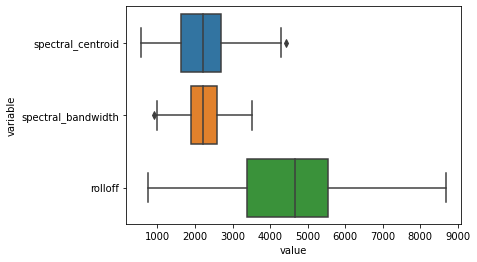

In [10]:
sns.boxplot(x = 'value', y = 'variable', data = df[['spectral_centroid', 'spectral_bandwidth',
                                                   'rolloff']].melt())
plt.show()

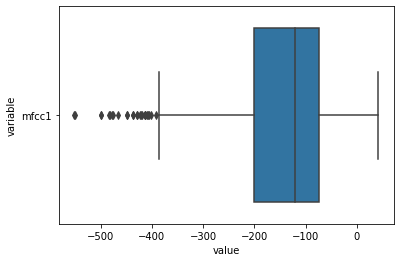

In [11]:
sns.boxplot(x = 'value', y = 'variable', data = df[['mfcc1']].melt())
plt.show()

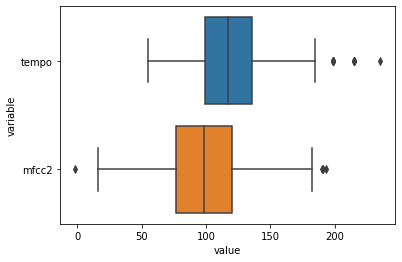

In [12]:
sns.boxplot(x = 'value', y = 'variable', data = df[['tempo', 'mfcc2']].melt())
plt.show()

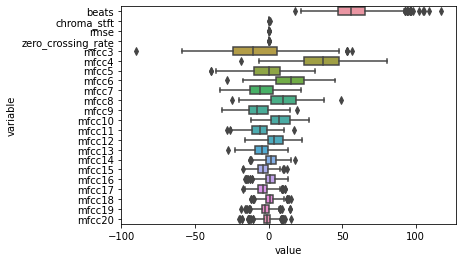

In [13]:
sns.boxplot(x = 'value', y = 'variable', data = df.drop(['filename', 'label', 'tempo', 'mfcc2',
                                                         'spectral_centroid', 'spectral_bandwidth',
                                                         'rolloff', 'mfcc1'], axis = 1).iloc[:, 0:28].melt())
plt.show()

Pelos bloxplot acima verificamos que existe outliers na marioria das variáveis. Para remover os outliers utilizamos o código a seguir. Neste código removemos os valores abaixo de $Q1 - 1.5 IQR$ e acima de $Q3 + 1.5 IQR$, para cada uma das variáveis.

In [14]:
for i in range(0, 26):
  data = df.drop(['filename', 'label'], axis = 1)
  name_column = data.columns[i]
  Q1 = data.describe().unstack()[name_column, '25%']
  Q3 = data.describe().unstack()[name_column, '75%']
  IQR = Q3 - Q1
  df_extra = np.array(data[name_column].values.tolist())
  df[name_column] = np.where(df_extra < Q1 - 1.5 * IQR, data.iloc[:, i].mean(), df_extra).tolist()
  df[name_column] = np.where(df_extra > Q3 + 1.5 * IQR, data.iloc[:, i].mean(), df_extra).tolist()

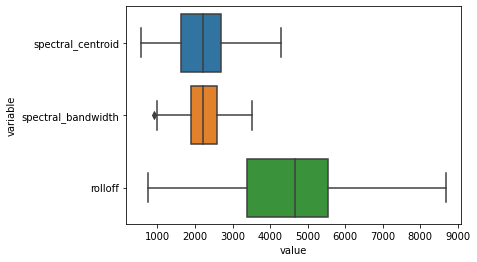

In [15]:
sns.boxplot(x = 'value', y = 'variable', data = df[['spectral_centroid', 'spectral_bandwidth',
                                                   'rolloff']].melt())
plt.show()

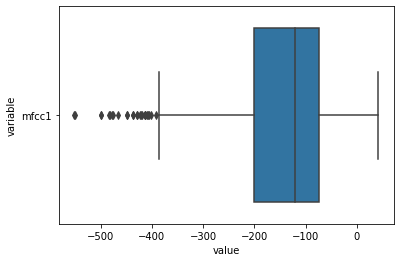

In [16]:
sns.boxplot(x = 'value', y = 'variable', data = df[['mfcc1']].melt())
plt.show()

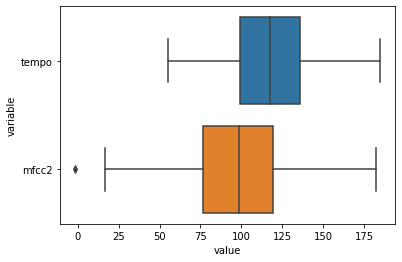

In [17]:
sns.boxplot(x = 'value', y = 'variable', data = df[['tempo', 'mfcc2']].melt())
plt.show()

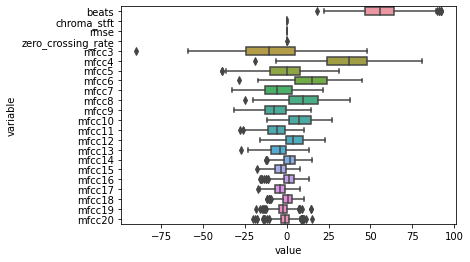

In [18]:
sns.boxplot(x = 'value', y = 'variable', data = df.drop(['filename', 'label', 'tempo', 'mfcc2',
                                                         'spectral_centroid', 'spectral_bandwidth',
                                                         'rolloff', 'mfcc1'], axis = 1).iloc[:, 0:28].melt())
plt.show()

A maioria dos outliers foram removidos.

#### Normalizando as variáveis

Neste passo separamos a variável explicativa ($X$) da variável resposta ($y$). Em seguinda normalizamos as variáveis, usando 'StandardScaler', para que fiquem na mesma escala.

In [19]:
X = df.drop(['filename', 'label'], axis = 1)
y = df['label']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1000 non-null   float64
 1   beats               1000 non-null   float64
 2   chroma_stft         1000 non-null   float64
 3   rmse                1000 non-null   float64
 4   spectral_centroid   1000 non-null   float64
 5   spectral_bandwidth  1000 non-null   float64
 6   rolloff             1000 non-null   float64
 7   zero_crossing_rate  1000 non-null   float64
 8   mfcc1               1000 non-null   float64
 9   mfcc2               1000 non-null   float64
 10  mfcc3               1000 non-null   float64
 11  mfcc4               1000 non-null   float64
 12  mfcc5               1000 non-null   float64
 13  mfcc6               1000 non-null   float64
 14  mfcc7               1000 non-null   float64
 15  mfcc8               1000 non-null   float64
 16  mfcc9  

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns = df.drop(['filename', 'label'], axis = 1).columns)

#### **Análise de Componentes Principais (PCA)**

Usamos a análise de componentes principais para reduzir o tamanho da base de dados.

In [22]:
from sklearn.decomposition import PCA
# escolhendo número de dimensões
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99999999) + 1

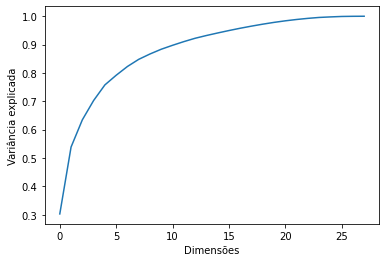

In [23]:
plt.plot(cumsum)
plt.ylabel('Variância explicada')
plt.xlabel('Dimensões')
plt.show()

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = d)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(data = principalComponents) #,  columns = ['principal component 1', 'principal component 2'])

#### **Dados em treinamento e teste**

Separamos dividimos os dados em dados de treinamento e dados de teste, sendo 30% para teste e 70% para treinamento.

In [25]:
# todas as colunas da base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = 'False', random_state = 376)

#### **Treinamento dos modelos Ensemble**

* Agora com os dados organizados e arrumados aplicamos os modelos Ensemble.

* Os modelos usados são os modelos ensemble. Os modelos ensemble são técnicas avançadas para resolver problemas conplexos, em que modelos independentes são conbinados para se conseguir um resultado melhor. A relação dos modelos usados é a seguinte:
  * Bagging;
  * Random Forest;
  * AddaBoost;
  * Gradiente Estocástico Boosting;
  * Voting Ensemble.

* Em cada aplicação de modelo, são apresentados os melhores modelos parâmetros usados em cada modelo ou o melhor modelo com seus parâmetros como no caso do modelo Voting Ensemble.

##### **Modelo Bagging**

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


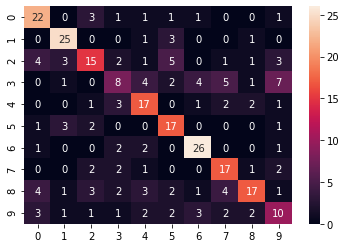

              precision    recall  f1-score   support

       blues       0.63      0.73      0.68        30
   classical       0.74      0.83      0.78        30
     country       0.56      0.43      0.48        35
       disco       0.38      0.25      0.30        32
      hiphop       0.53      0.63      0.58        27
        jazz       0.53      0.71      0.61        24
       metal       0.72      0.81      0.76        32
         pop       0.55      0.68      0.61        25
      reggae       0.68      0.45      0.54        38
        rock       0.37      0.37      0.37        27

    accuracy                           0.58       300
   macro avg       0.57      0.59      0.57       300
weighted avg       0.57      0.58      0.57       300



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 10, random_state = 376)
model_1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 376)

print(model_1.fit(X_train, y_train), '\n')

# predizendo a nota de novos alunos
y_pred = model_1.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results_1 = accuracy_score(y_test, y_pred)
print('Acurácia modelo Bagging: {}.'.format(results_1))

print("Melhores parâmetros:")
print(model_1.base_estimator, '\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

##### **Random Forest Classification**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Acurácia modelo Random Forest: 0.62.
Melhores parâmetros:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_

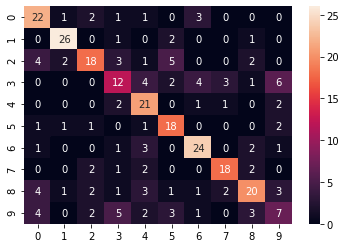

              precision    recall  f1-score   support

       blues       0.61      0.73      0.67        30
   classical       0.84      0.87      0.85        30
     country       0.67      0.51      0.58        35
       disco       0.44      0.38      0.41        32
      hiphop       0.55      0.78      0.65        27
        jazz       0.58      0.75      0.65        24
       metal       0.71      0.75      0.73        32
         pop       0.75      0.72      0.73        25
      reggae       0.65      0.53      0.58        38
        rock       0.33      0.26      0.29        27

    accuracy                           0.62       300
   macro avg       0.61      0.63      0.61       300
weighted avg       0.62      0.62      0.61       300



In [27]:
from sklearn.ensemble import RandomForestClassifier

kfold = model_selection.KFold(n_splits = 10, random_state = 376)
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 5)

print(model_rf.fit(X_train, y_train), '\n')

# predizendo a nota de novos alunos
y_pred = model_rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results_rf = accuracy_score(y_test, y_pred)
print('Acurácia modelo Random Forest: {}.'.format(results_rf))

print("Melhores parâmetros:")
print(model_rf.base_estimator, '\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

##### **Modelo AdaBoost**

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=376) 

Acurácia modelo AdaBoost: 0.15333333333333332.
Melhores parâmetros:
None 



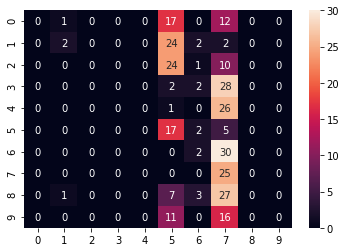

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        30
   classical       0.50      0.07      0.12        30
     country       0.00      0.00      0.00        35
       disco       0.00      0.00      0.00        32
      hiphop       0.00      0.00      0.00        27
        jazz       0.17      0.71      0.27        24
       metal       0.17      0.06      0.09        32
         pop       0.14      1.00      0.24        25
      reggae       0.00      0.00      0.00        38
        rock       0.00      0.00      0.00        27

    accuracy                           0.15       300
   macro avg       0.10      0.18      0.07       300
weighted avg       0.09      0.15      0.06       300



In [28]:
from sklearn.ensemble import AdaBoostClassifier

kfold_ada = model_selection.KFold(n_splits = 10, random_state = 376)
model_ada = AdaBoostClassifier(n_estimators = 30, random_state = 376)

print(model_ada.fit(X_train, y_train), '\n')

# predizendo a nota de novos alunos
y_pred = model_ada.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results_ada = accuracy_score(y_test, y_pred)
print('Acurácia modelo AdaBoost: {}.'.format(results_ada))

print("Melhores parâmetros:")
print(model_ada.base_estimator, '\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

##### **Modelo Gradiente Estocástico Boosting**

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=376, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

Acurácia modelo Gradiente Estocástico Boosting: 0.6066666666666667.
Melhores parâmetros:
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                

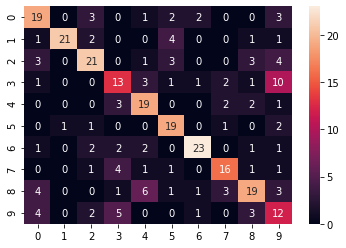

              precision    recall  f1-score   support

       blues       0.58      0.63      0.60        30
   classical       0.95      0.70      0.81        30
     country       0.66      0.60      0.63        35
       disco       0.46      0.41      0.43        32
      hiphop       0.58      0.70      0.63        27
        jazz       0.61      0.79      0.69        24
       metal       0.82      0.72      0.77        32
         pop       0.67      0.64      0.65        25
      reggae       0.61      0.50      0.55        38
        rock       0.32      0.44      0.37        27

    accuracy                           0.61       300
   macro avg       0.63      0.61      0.61       300
weighted avg       0.63      0.61      0.61       300



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

kfold_sgb = model_selection.KFold(n_splits = 10, random_state = 376)
model_sgb = GradientBoostingClassifier(n_estimators = 100, random_state = 376)

print(model_sgb.fit(X_train, y_train), '\n')

# predizendo a nota de novos alunos
y_pred = model_sgb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results_sgb = accuracy_score(y_test, y_pred)
print('Acurácia modelo Gradiente Estocástico Boosting: {}.'.format(results_sgb))

print("Melhores parâmetros:")
print(model_sgb.get_params, '\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

##### **Modelo Voting Ensemble**

0.0
VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                    

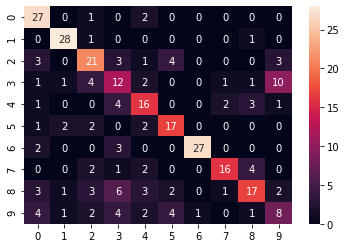

              precision    recall  f1-score   support

       blues       0.64      0.90      0.75        30
   classical       0.85      0.93      0.89        30
     country       0.58      0.60      0.59        35
       disco       0.36      0.38      0.37        32
      hiphop       0.53      0.59      0.56        27
        jazz       0.63      0.71      0.67        24
       metal       0.96      0.84      0.90        32
         pop       0.80      0.64      0.71        25
      reggae       0.63      0.45      0.52        38
        rock       0.33      0.30      0.31        27

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold_vc = model_selection.KFold(n_splits = 10, random_state = 376)
# Lines 2 to 8
estimators = []
mod_lr = LogisticRegression()
estimators.append(('logistic', mod_lr))
mod_dt = DecisionTreeClassifier()
estimators.append(('cart', mod_dt))
mod_sv = SVC()
estimators.append(('svm', mod_sv))
 
# Lines 9 to 11
ensemble = VotingClassifier(estimators)
results_vc = model_selection.cross_val_score(ensemble, X, y, cv = kfold_vc)
print(results_vc.mean())

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold_vc = model_selection.KFold(n_splits = 10, random_state = 376)
# Lines 2 to 8
estimators = []
mod_lr = LogisticRegression()
estimators.append(('logistic', mod_lr))
mod_dt = DecisionTreeClassifier()
estimators.append(('cart', mod_dt))
mod_sv = SVC()
estimators.append(('svm', mod_sv))

# Lines 9 to 11
ensemble = VotingClassifier(estimators)
print(ensemble.fit(X_train, y_train), '\n')

# predizendo a nota de novos alunos
y_pred = ensemble.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results_vc = accuracy_score(y_test, y_pred)
print('Acurácia modelo Voting Ensemble: {}.'.format(results_vc))

print("Melhores parâmetros:")
print(ensemble.named_estimators_, '\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

#### **Resumo dos modelos**

Por último apresentamos os resultados da acurácia dos modelos em forma de tabela e gráfico.

In [31]:
import pandas as pd

results_ac = []
results_ac.append(round(results_1.mean(), 4))
results_ac.append(round(results_rf.mean(), 4))
results_ac.append(round(results_sgb.mean(), 4))
results_ac.append(round(results_ada.mean(), 4))
results_ac.append(round(results_vc.mean(), 4))
names = ['Bagging', 'Random Forest', 'Boosting Adaptável', 'AdaBoost', 'Voting Ensemble']
results_final = pd.DataFrame([names, results_ac]).T
results_final.columns = ['Modelo Ensemble', 'Acurácia']
results_final
results_final.sort_values(['Acurácia'], ascending = False)

,Modelo Ensemble,Acurácia
4,Voting Ensemble,0.63
1,Random Forest,0.62
2,Boosting Adaptável,0.6067
0,Bagging,0.58
3,AdaBoost,0.1533


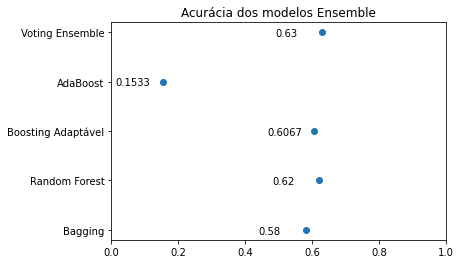

In [32]:
plt.scatter(results_final['Acurácia'], results_final['Modelo Ensemble'])
for i in range(0, len(results_final['Acurácia'])):
  plt.annotate(results_final['Acurácia'][i], xy = (results_final['Acurácia'][i], 0.05 + i),
               xytext = (results_final['Acurácia'][i] - 0.14, -0.08 + i))
plt.title('Acurácia dos modelos Ensemble')
axes = plt.gca()
axes.set_xlim([0, 1])
# plt.set_ylim([ymin,ymax])
plt.show()

* Pelos resultados o melhor modelo é o Voting Ensemble com $63.00%$ de acurácia, neste modelo utiliza-se os modelos Regressão Logística, Árvore de Decisão e Máquina de Vetor Suporte (SVM). Apesar disso o modelo Random Forest também teve acurácia próxima. E o pior foi o modelo AdaBoost com acurácia de $15.33\%$.

* Apesar do modelo Voting Ensemble se apresentar melhor entre os modelos apresentados, pode haver modelos melhores. Porém, o objetivo do estudo foi a aplciação dos métodos Ensemble.